 ## HR DATA ANALYSIS

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ibm=pd.read_csv(r"C:\Users\Srujan Anirudh\Desktop\COE2\data sets2\ibm.csv")
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
ibm.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 1 What is the overall attrition rate in the company?


Q31 ➤ Average Years Since Last Promotion by Department:
 Department
Human Resources           0.00
Research & Development    2.35
Sales                     1.74
Name: YearsSinceLastPromotion, dtype: float64


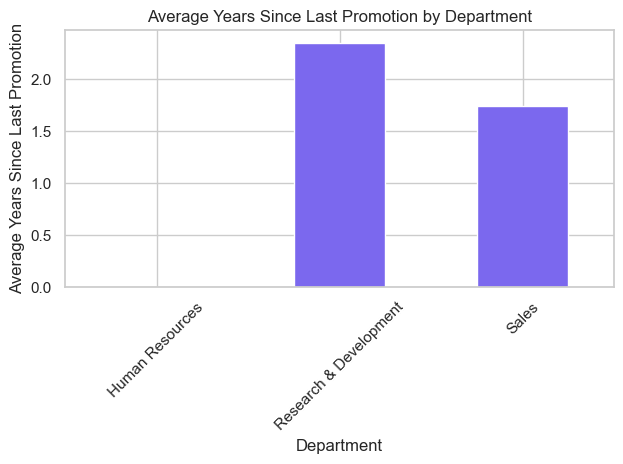

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
ibm = pd.read_csv(r"C:\Users\Srujan Anirudh\Desktop\COE2\data sets2\ibm.csv")

# Average years since last promotion by department
avg_promotion_by_dept = ibm.groupby('Department')['YearsSinceLastPromotion'].mean().round(2)
print("\nQ31 ➤ Average Years Since Last Promotion by Department:\n", avg_promotion_by_dept)

# Optional: plot the result
avg_promotion_by_dept.plot(kind='bar', color='mediumslateblue')
plt.title("Average Years Since Last Promotion by Department")
plt.xlabel("Department")
plt.ylabel("Average Years Since Last Promotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:

ibm['Attrition'].unique()
attrition_rate = (ibm['Attrition'].value_counts()['Yes'] / len(ibm)) * 100
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")


Overall Attrition Rate: 15.15%


# 2. Which department has the highest attrition rate?


Attrition Rate by Department:
Department
Sales                     18.518519
Research & Development    14.084507
Human Resources                 NaN
Name: count, dtype: float64


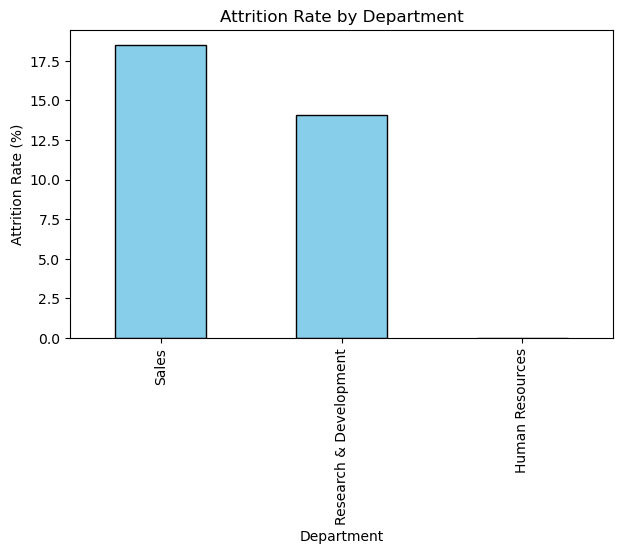

In [50]:
dept_attr = ibm[ibm.Attrition == 'Yes'].Department.value_counts() / ibm.Department.value_counts() * 100
print("\nAttrition Rate by Department:")
print(dept_attr.sort_values(ascending=False))

plt.figure(figsize=(7,4))
dept_attr.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate (%)")
plt.show()

# 3. Average Age (Left vs Stayed)

In [5]:
avg_age_by_attrition = ibm.groupby('Attrition')['Age'].mean().round(2)
print("\nAverage Age by Attrition Status:\n", avg_age_by_attrition)


Average Age by Attrition Status:
 Attrition
No     37.55
Yes    36.40
Name: Age, dtype: float64


# 4. Distance from Home vs Attrition

In [61]:
b = ibm.groupby('Attrition')['DistanceFromHome'].mean()
print("\nAverage Distance From Home by Attrition Status:")
print(b)


Average Distance From Home by Attrition Status:
Attrition
No     8.000000
Yes    8.533333
Name: DistanceFromHome, dtype: float64


# 5. Gender vs Attrition


Attrition Rate by Gender:
Gender
Male      18.750000
Female     8.571429
Name: count, dtype: float64


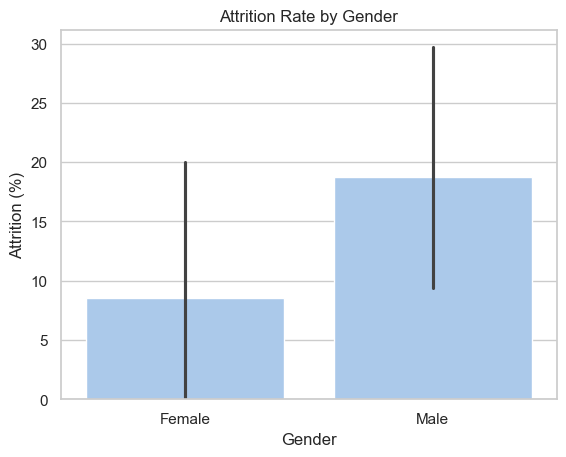

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate attrition rate by gender
gender_attr = ibm[ibm.Attrition == 'Yes'].Gender.value_counts() / ibm.Gender.value_counts() * 100
print("\nAttrition Rate by Gender:")
print(gender_attr)

# Convert 'Attrition' column safely to numeric (no warning)
ibm_copy = ibm.copy()
ibm_copy['Attrition'] = ibm_copy['Attrition'].map({'Yes': 1, 'No': 0}).astype(float)

# Plot
sns.barplot(x='Gender', y='Attrition', data=ibm_copy, estimator=lambda x: sum(x)*100/len(x))
plt.title("Attrition Rate by Gender")
plt.ylabel("Attrition (%)")
plt.show()


# 6. Job Satisfaction vs Attrition

In [68]:
# Calculate average job satisfaction by attrition
a = ibm.groupby('Attrition')['JobSatisfaction'].mean()

print("\nAverage Job Satisfaction by Attrition Status:")
print(a)



Average Job Satisfaction by Attrition Status:
Attrition
No     2.750000
Yes    2.866667
Name: JobSatisfaction, dtype: float64


# 7. Job Role vs Attrition


Attrition Rate by Job Role:
JobRole
Sales Representative         60.000000
Laboratory Technician        20.000000
Research Scientist           20.000000
Research Director            14.285714
Sales Executive              10.000000
Healthcare Representative          NaN
Human Resources                    NaN
Manager                            NaN
Manufacturing Director             NaN
Name: count, dtype: float64


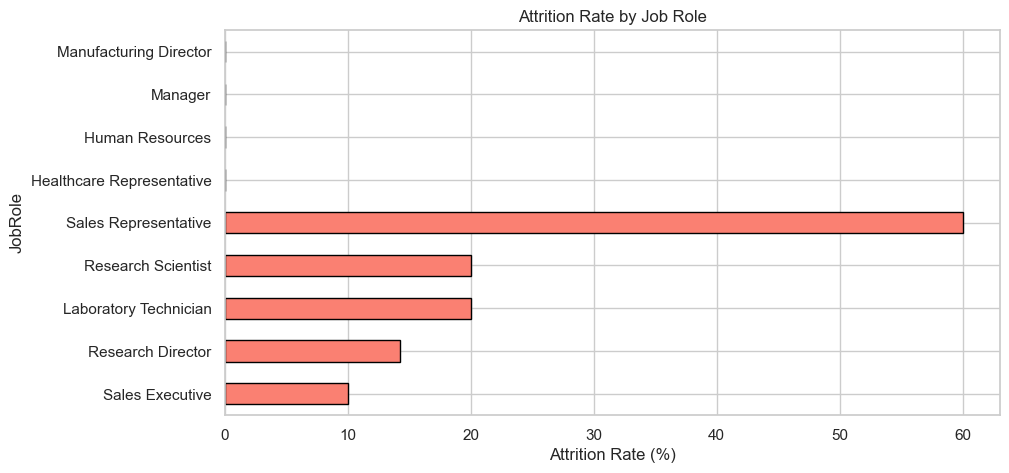

In [69]:
role_attr = ibm[ibm.Attrition == 'Yes'].JobRole.value_counts() / ibm.JobRole.value_counts() * 100
print("\nAttrition Rate by Job Role:")
print(role_attr.sort_values(ascending=False))

plt.figure(figsize=(10,5))
role_attr.sort_values().plot(kind='barh', color='salmon', edgecolor='black')
plt.title("Attrition Rate by Job Role")
plt.xlabel("Attrition Rate (%)")
plt.show()

# 8. Education Level vs Attrition


Attrition Rate by Education Level:
Education
1    20.000000
2    20.000000
3    18.181818
4     7.142857
5          NaN
Name: count, dtype: float64


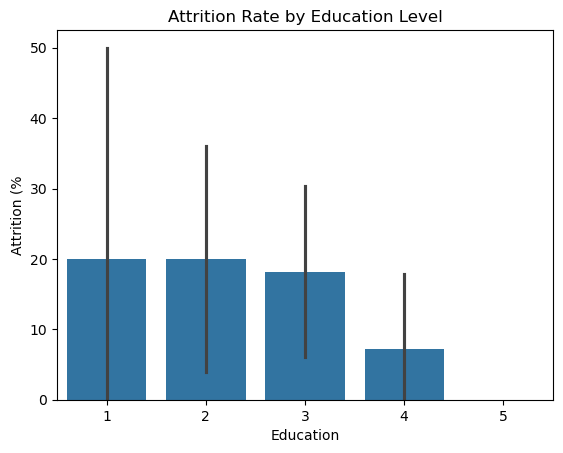

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate attrition rate by education level
edu_attr = ibm[ibm.Attrition == 'Yes'].Education.value_counts() / ibm.Education.value_counts() * 100

print("\nAttrition Rate by Education Level:")
print(edu_attr.sort_index())

# Convert 'Attrition' to numeric for plotting
ibm_copy = ibm.copy()
ibm_copy['Attrition'] = ibm_copy['Attrition'].map({'Yes': 1, 'No': 0}).astype(float)

# Plot the barplot
sns.barplot(x='Education', y='Attrition', data=ibm_copy, estimator=lambda x: sum(x)*100/len(x))
plt.title("Attrition Rate by Education Level")
plt.ylabel("Attrition (%")
plt.show()


# 9. Training Times vs Attrition

In [77]:
train_attr = ibm.groupby('Attrition')['TrainingTimesLastYear'].mean()
print("\nAverage Training Times Last Year by Attrition Status:")
print(train_attr)


Average Training Times Last Year by Attrition Status:
Attrition
No     2.797619
Yes    2.533333
Name: TrainingTimesLastYear, dtype: float64


# 10. OverTime vs Attrition

In [8]:
import pandas as pd
# Calculate attrition rate by OverTime status
over_attr = ibm[ibm.Attrition == 'Yes'].OverTime.value_counts() / ibm.OverTime.value_counts() * 100
print("\nAttrition Rate by OverTime Status:")
print(over_attr)
# Convert 'Attrition' column safely
ibm_copy = ibm.copy()
ibm_copy['Attrition'] = ibm_copy['Attrition'].map({'Yes': 1, 'No': 0}).astype(float)



Attrition Rate by OverTime Status:
OverTime
No      9.090909
Yes    27.272727
Name: count, dtype: float64


# 11.What is the average monthly income of employees who left compared to those who stayed?

In [21]:

avg_income = ibm.groupby('Attrition')['MonthlyIncome'].mean()
print(avg_income)
print(f"Average Monthly Income of Employees Who Left: {avg_income['Yes']:.2f}")
print(f"Average Monthly Income of Employees Who Stayed: {avg_income['No']:.2f}")



Attrition
No     6297.988095
Yes    4741.733333
Name: MonthlyIncome, dtype: float64
Average Monthly Income of Employees Who Left: 4741.73
Average Monthly Income of Employees Who Stayed: 6297.99


# 12.How does attrition vary by marital status?

In [29]:

attrition_by_marital = ibm.groupby(['MaritalStatus', 'Attrition']).size().unstack()
print(attrition_by_marital)

#the percentage of each group left
print('the percentage of each group left')
attrition_rate = (attrition_by_marital['Yes'] / (attrition_by_marital['Yes'] + attrition_by_marital['No'])) * 100
print(attrition_rate)


Attrition        No   Yes
MaritalStatus            
Divorced       22.0   NaN
Married        35.0   5.0
Single         27.0  10.0
the percentage of each group left
MaritalStatus
Divorced          NaN
Married     12.500000
Single      27.027027
dtype: float64


# 13 What is the relationship between total working years and attrition?

Attrition
No     11.392857
Yes     9.133333
Name: TotalWorkingYears, dtype: float64


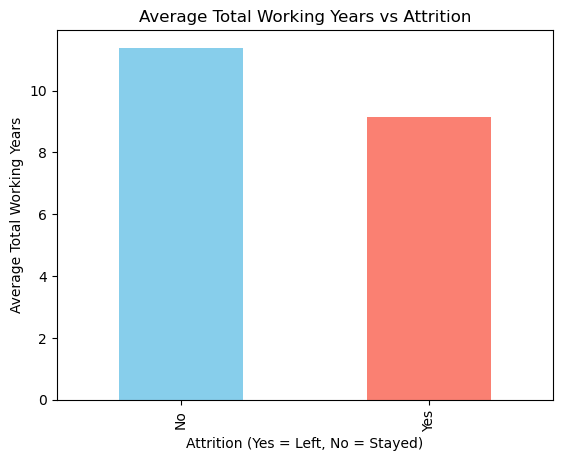

In [28]:

avg_work_years = ibm.groupby('Attrition')['TotalWorkingYears'].mean()
print(avg_work_years)

import matplotlib.pyplot as plt

avg_work_years.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Total Working Years vs Attrition')
plt.ylabel('Average Total Working Years')
plt.xlabel('Attrition (Yes = Left, No = Stayed)')
plt.show()


# 14.Which age group experiences the most attrition?

Attrition count by Age Group:
Attrition    No  Yes
AgeGroup            
18–25       5.0  1.0
26–35      31.0  5.0
36–45      28.0  6.0
46–55      13.0  3.0
56–65       7.0  NaN

Attrition Rate by Age Group (%):
AgeGroup
18–25    16.666667
26–35    13.888889
36–45    17.647059
46–55    18.750000
56–65     0.000000
Name: Attrition, dtype: float64

The age group with the highest attrition is 46–55 (18.75%).


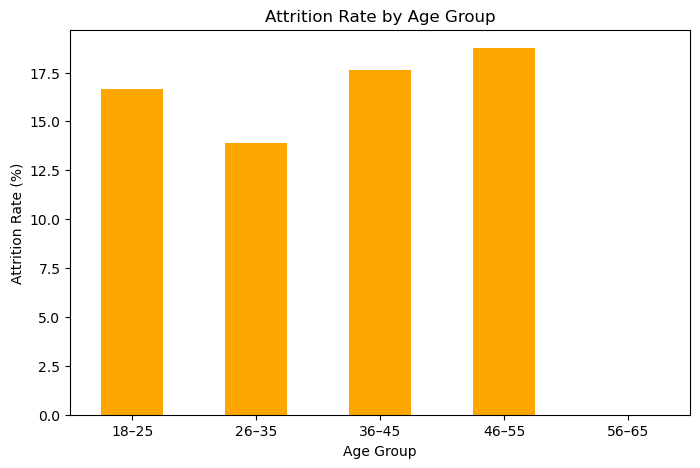

In [9]:
bins = [18, 25, 35, 45, 55, 65]  # age ranges
labels = ['18–25', '26–35', '36–45', '46–55', '56–65']
ibm['AgeGroup'] = pd.cut(ibm['Age'], bins=bins, labels=labels, right=False)
age_attrition = ibm.groupby(['AgeGroup', 'Attrition'], observed=True).size().unstack()
print("Attrition count by Age Group:")
print(age_attrition)
age_attrition_rate = (
    ibm.groupby('AgeGroup', observed=True)['Attrition']
    .apply(lambda x: (x == 'Yes').mean() * 100)
)
print("\nAttrition Rate by Age Group (%):")
print(age_attrition_rate)
highest_group = age_attrition_rate.idxmax()
highest_rate = age_attrition_rate.max()
print(f"\nThe age group with the highest attrition is {highest_group} ({highest_rate:.2f}%).")
age_attrition_rate.plot(kind='bar', color='orange', figsize=(8,5))
plt.title('Attrition Rate by Age Group')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()

# 15How does environment satisfaction relate to attrition?


| Value | Description           |
| ----- | --------------------- |
| 1     | Low involvement       |
| 2     | Moderate involvement  |
| 3     | High involvement      |
| 4     | Very high involvement |

Attrition count by Environment Satisfaction:
Attrition                No  Yes
EnvironmentSatisfaction         
1                        19    3
2                        19    5
3                        24    4
4                        22    3

Attrition Rate by Environment Satisfaction (%):
EnvironmentSatisfaction
1    13.636364
2    20.833333
3    14.285714
4    12.000000
Name: Attrition, dtype: float64

 Employees with Environment Satisfaction level 2 have the highest attrition (20.83%).


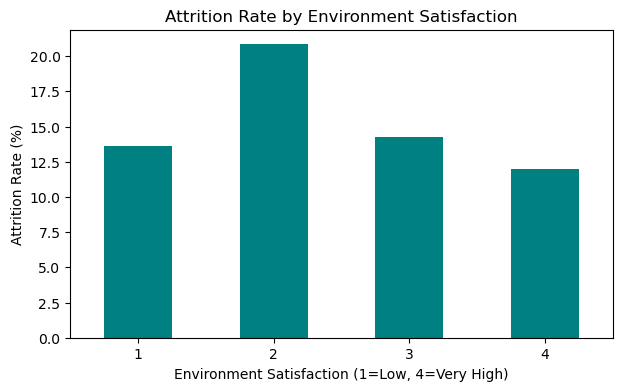

In [10]:
#Does an employee’s satisfaction with their work environment affect whether they leave the company or stay?
print('''| Value | Description           |
| ----- | --------------------- |
| 1     | Low involvement       |
| 2     | Moderate involvement  |
| 3     | High involvement      |
| 4     | Very high involvement |
''')
env_attrition = ibm.groupby(['EnvironmentSatisfaction', 'Attrition'], observed=True).size().unstack()
print("Attrition count by Environment Satisfaction:")
print(env_attrition)
env_attrition_rate = (
    ibm.groupby('EnvironmentSatisfaction', observed=True)['Attrition']
    .apply(lambda x: (x == 'Yes').mean() * 100)
)
print("\nAttrition Rate by Environment Satisfaction (%):")
print(env_attrition_rate)

# Identify satisfaction level with highest attrition
highest_env = env_attrition_rate.idxmax()
highest_rate = env_attrition_rate.max()
print(f"\n Employees with Environment Satisfaction level {highest_env} have the highest attrition ({highest_rate:.2f}%).")
# Plot graph
env_attrition_rate.plot(kind='bar', color='teal', figsize=(7,4))
plt.title('Attrition Rate by Environment Satisfaction')
plt.xlabel('Environment Satisfaction (1=Low, 4=Very High)')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.show()

# 16What is the distribution of job levels among employees who left?


| JobLevel | Description                   |
| -------- | ----------------------------- |
| 1        | Entry-level / Junior employee |
| 2        | Mid-level employee            |
| 3        | Senior employee               |
| 4        | Manager                       |
| 5        | Executive / Director level    |
Distribution of Job Levels among employees who left:
JobLevel
1    10
2     2
3     2
5     1
Name: count, dtype: int64


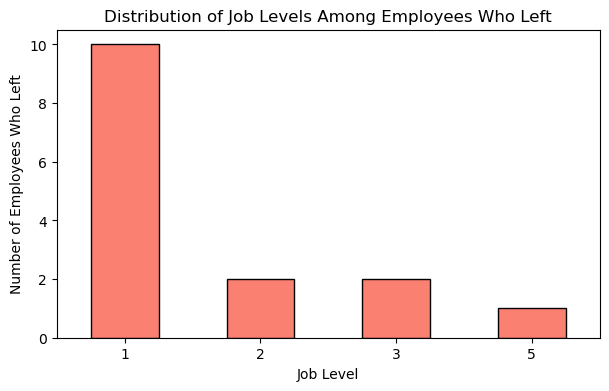

In [47]:
#Among the employees who left the company (Attrition = "Yes"), how are their job levels distributed?
#Do more junior employees leave, or do senior employees leave more often?
print('''| JobLevel | Description                   |
| -------- | ----------------------------- |
| 1        | Entry-level / Junior employee |
| 2        | Mid-level employee            |
| 3        | Senior employee               |
| 4        | Manager                       |
| 5        | Executive / Director level    |''')

left_employees = ibm[ibm['Attrition'] == 'Yes']
joblevel_distribution = left_employees['JobLevel'].value_counts().sort_index()
print("Distribution of Job Levels among employees who left:")
print(joblevel_distribution)
# Plot the distribution
plt.figure(figsize=(7,4))
joblevel_distribution.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Job Levels Among Employees Who Left')
plt.xlabel('Job Level')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=0)
plt.show()

# 17Are employees with higher performance ratings less likely to leave?


| ------ | ------------------- |
| 1      | Low performer       |
| 2      | Below average       |
| 3      | Good performer      |
| 4      | Excellent performer |
Performance Rating vs Attrition:
Attrition          No  Yes
PerformanceRating         
3                  65   13
4                  19    2

Attrition Rate by Performance Rating:
Attrition          AttritionRate(%)
PerformanceRating                  
3                         16.666667
4                          9.523810


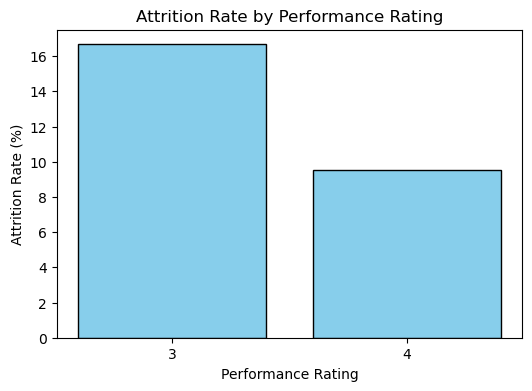

In [43]:
#Do high-performing employees stay longer in the company, or do they also leave like others?
#| Rating | Meaning             |
print('| ------ | ------------------- |')
print('| 1      | Low performer       |')
print('| 2      | Below average       |')
print('| 3      | Good performer      |')
print('| 4      | Excellent performer |')

performance_attrition = ibm.groupby(['PerformanceRating', 'Attrition']).size().unstack(fill_value=0)

print("Performance Rating vs Attrition:")
print(performance_attrition)
# Calculate attrition rate (%) for each performance rating
performance_attrition['AttritionRate(%)'] = (
    performance_attrition['Yes'] / 
    (performance_attrition['Yes'] + performance_attrition['No'])
) * 100
print("\nAttrition Rate by Performance Rating:")
print(performance_attrition[['AttritionRate(%)']])
# Plot the attrition rate
plt.figure(figsize=(6,4))
plt.bar(performance_attrition.index, performance_attrition['AttritionRate(%)'], color='skyblue', edgecolor='black')
plt.title('Attrition Rate by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Attrition Rate (%)')
plt.xticks(performance_attrition.index)
plt.show()

# 18How does business travel frequency affect attrition?


Business Travel vs Attrition:
Attrition          No  Yes
BusinessTravel            
Non-Travel          6    0
Travel_Frequently  16    1
Travel_Rarely      62   14

Attrition Rate by Business Travel Frequency:
Attrition          AttritionRate(%)
BusinessTravel                     
Non-Travel                 0.000000
Travel_Frequently          5.882353
Travel_Rarely             18.421053


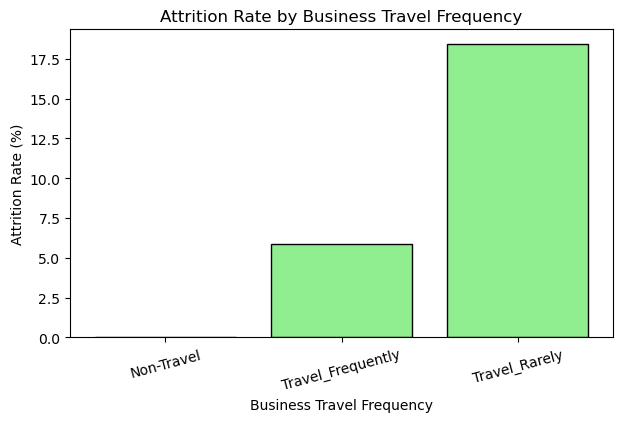

In [44]:
#Do people who travel frequently for business tend to leave more often or less often?
# Group by BusinessTravel and Attrition
travel_attrition = ibm.groupby(['BusinessTravel', 'Attrition']).size().unstack(fill_value=0)

print("Business Travel vs Attrition:")
print(travel_attrition)

# Calculate attrition rate (%) for each travel frequency
travel_attrition['AttritionRate(%)'] = (
    travel_attrition['Yes'] / 
    (travel_attrition['Yes'] + travel_attrition['No'])
) * 100

print("\nAttrition Rate by Business Travel Frequency:")
print(travel_attrition[['AttritionRate(%)']])

# Plot
plt.figure(figsize=(7,4))
plt.bar(travel_attrition.index, travel_attrition['AttritionRate(%)'], color='lightgreen', edgecolor='black')
plt.title('Attrition Rate by Business Travel Frequency')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=15)
plt.show()

# 19Which department pays the highest average monthly income?

Average Monthly Income by Department:
Department
Sales                     6624.370370
Research & Development    5863.070423
Human Resources           5021.000000
Name: MonthlyIncome, dtype: float64

🏆 Department with Highest Average Income: Sales ($6624.37)


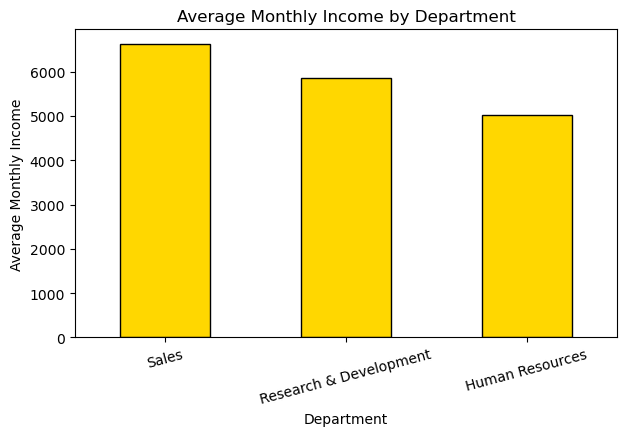

In [45]:
#Which department pays the highest average monthly income?”
# Group by Department and find average income
dept_income = ibm.groupby('Department')['MonthlyIncome'].mean().sort_values(ascending=False)

print("Average Monthly Income by Department:")
print(dept_income)

# Find the department with the highest average income
highest_dept = dept_income.idxmax()
highest_income = dept_income.max()

print(f"\n🏆 Department with Highest Average Income: {highest_dept} (${highest_income:.2f})")

# Plot the result
plt.figure(figsize=(7,4))
dept_income.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Average Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=15)
plt.show()

# 20How does attrition vary by job involvement level?


| Value | Description           |
| ----- | --------------------- |
| 1     | Low involvement       |
| 2     | Moderate involvement  |
| 3     | High involvement      |
| 4     | Very high involvement |
Job Involvement vs Attrition:
Attrition       No  Yes
JobInvolvement         
1                2    2
2               20    7
3               52    6
4               10    0

Attrition Rate by Job Involvement Level:
Attrition       AttritionRate(%)
JobInvolvement                  
1                      50.000000
2                      25.925926
3                      10.344828
4                       0.000000


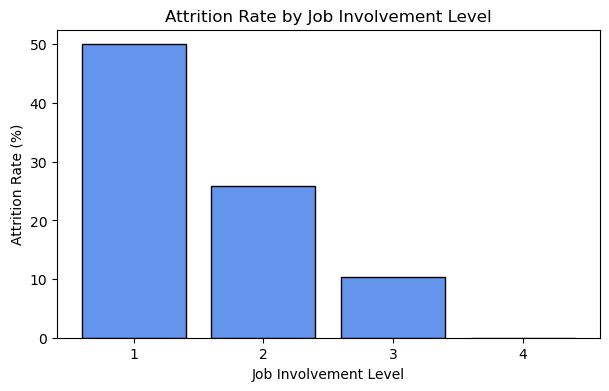

In [46]:
#Does being more dedicated and engaged at work reduce the chance of quittin
print('| Value | Description           |')
print('| ----- | --------------------- |')
print('| 1     | Low involvement       |')
print('| 2     | Moderate involvement  |')
print('| 3     | High involvement      |')
print('| 4     | Very high involvement |')
# Group by JobInvolvement and Attrition
job_involvement_attrition = ibm.groupby(['JobInvolvement', 'Attrition']).size().unstack(fill_value=0)

print("Job Involvement vs Attrition:")
print(job_involvement_attrition)

# Calculate attrition rate (%) for each involvement level
job_involvement_attrition['AttritionRate(%)'] = (
    job_involvement_attrition['Yes'] /
    (job_involvement_attrition['Yes'] + job_involvement_attrition['No'])
) * 100

print("\nAttrition Rate by Job Involvement Level:")
print(job_involvement_attrition[['AttritionRate(%)']])

# Plot the attrition rate
plt.figure(figsize=(7,4))
plt.bar(job_involvement_attrition.index, job_involvement_attrition['AttritionRate(%)'], 
        color='cornflowerblue', edgecolor='black')
plt.title('Attrition Rate by Job Involvement Level')
plt.xlabel('Job Involvement Level')
plt.ylabel('Attrition Rate (%)')
plt.xticks(job_involvement_attrition.index)
plt.show()


# Q21: Do employees with stock options stay longer?


Employees with stock options vs tenure:
                  count  mean  median
HasStockOptions                     
False               49  7.53     6.0
True                50  6.42     5.0


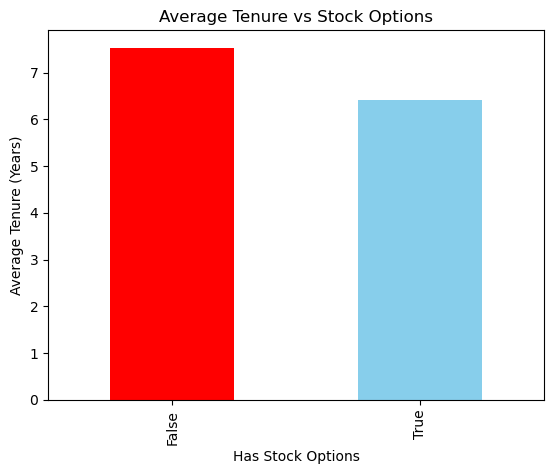

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a new boolean column: True if employee has stock options, False otherwise
ibm['HasStockOptions'] = ibm['StockOptionLevel'] > 0

# Group by stock options status and calculate count, mean, and median of YearsAtCompany
q21 = ibm.groupby('HasStockOptions')['YearsAtCompany'].agg(['count', 'mean', 'median']).round(2)
print("\nEmployees with stock options vs tenure:\n", q21)

# Plot average tenure
q21['mean'].plot(kind='bar', color=['red', 'skyblue'])
plt.title("Average Tenure vs Stock Options")
plt.xlabel("Has Stock Options")
plt.ylabel("Average Tenure (Years)")
plt.show()


# Q22: Relationship between salary hike % and attrition


Salary hike by attrition:
            count   mean
Attrition              
No            84  15.45
Yes           15  14.87
Correlation (PercentSalaryHike vs Attrition): -0.0531


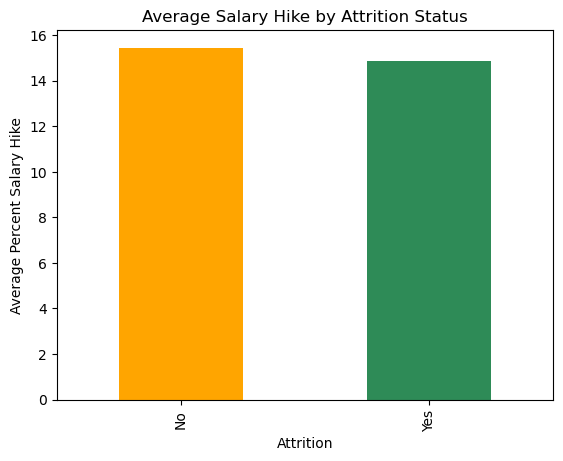

In [12]:
import matplotlib.pyplot as plt

# Map Attrition to numeric for correlation
ibm['Attrition_Flag'] = ibm['Attrition'].map({'Yes': 1, 'No': 0})

# Group by Attrition and calculate count and mean of PercentSalaryHike
q22 = ibm.groupby('Attrition')['PercentSalaryHike'].agg(['count', 'mean']).round(2)

# Correlation between PercentSalaryHike and Attrition
corr22 = ibm['PercentSalaryHike'].corr(ibm['Attrition_Flag'])

print("\nSalary hike by attrition:\n", q22)
print("Correlation (PercentSalaryHike vs Attrition):", round(corr22, 4))

# Plot average salary hike
q22['mean'].plot(kind='bar', color=['orange', 'seagreen'])
plt.title("Average Salary Hike by Attrition Status")
plt.xlabel("Attrition")
plt.ylabel("Average Percent Salary Hike")
plt.show()


# --- Q23: How many employees work overtime in each department? ---



Q23 ➤ Employees working overtime by department:
                Department  OverTime_Count
0         Human Resources               1
1  Research & Development              25
2                   Sales               7


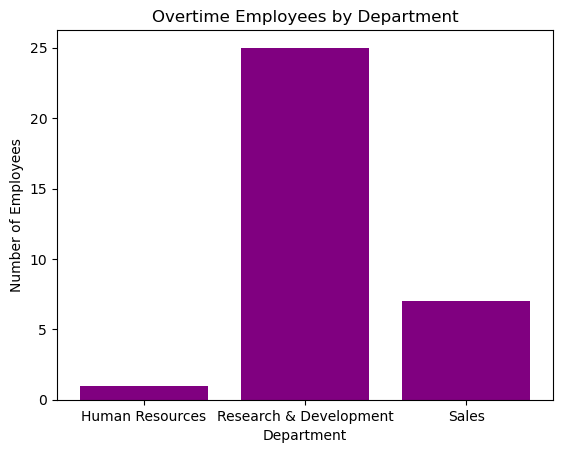

In [13]:

import matplotlib.pyplot as plt

# Count of employees working overtime by department
q23 = ibm[ibm['OverTime'] == 'Yes'].groupby('Department').size().reset_index(name='OverTime_Count')
print("\nQ23 ➤ Employees working overtime by department:\n", q23)

# Plot
plt.bar(q23['Department'], q23['OverTime_Count'], color='purple')
plt.title("Overtime Employees by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()


# Q24: Correlation between YearsAtCompany & YearsSinceLastPromotion


 Employees working overtime by department:
                Department  OverTime_Count
0         Human Resources               1
1  Research & Development              25
2                   Sales               7


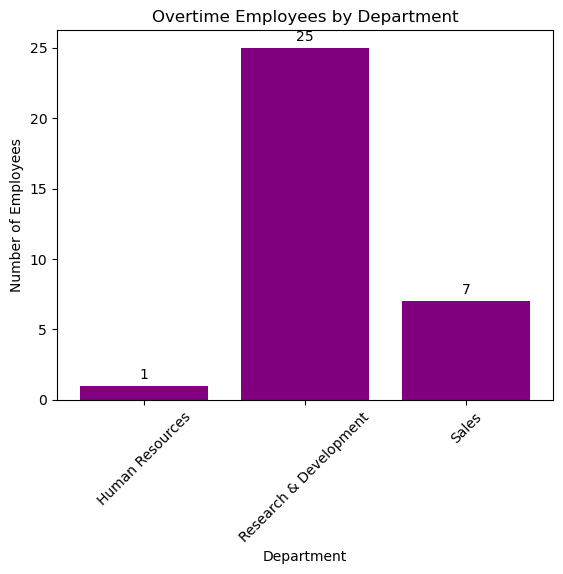

In [14]:
import matplotlib.pyplot as plt

# Count of employees working overtime by department
q23 = ibm[ibm['OverTime'] == 'Yes'].groupby('Department').size().reset_index(name='OverTime_Count')
print("\n Employees working overtime by department:\n", q23)

# Plot
plt.bar(q23['Department'], q23['OverTime_Count'], color='purple')
plt.title("Overtime Employees by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)

# Annotate bars with counts
for i, count in enumerate(q23['OverTime_Count']):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.show()


# --- Q25: Do employees with longer tenure tend to have higher satisfaction scores? ---

In [15]:
import pandas as pd

# Correlation between YearsAtCompany and JobSatisfaction
corr25 = ibm['YearsAtCompany'].corr(ibm['JobSatisfaction'])

# Bin YearsAtCompany
tenure_bins = pd.cut(ibm['YearsAtCompany'], [0, 2, 5, 10, 20, 40])

# Group by bins and calculate average JobSatisfaction
q25 = ibm.groupby(tenure_bins, observed=True)['JobSatisfaction'].mean().round(2)

print("\nCorrelation (YearsAtCompany vs JobSatisfaction):", round(corr25, 4))
print("\nAverage Job Satisfaction by Tenure Bins:\n", q25)



Correlation (YearsAtCompany vs JobSatisfaction): 0.0742

Average Job Satisfaction by Tenure Bins:
 YearsAtCompany
(0, 2]      2.84
(2, 5]      2.46
(5, 10]     2.89
(10, 20]    3.09
(20, 40]    2.86
Name: JobSatisfaction, dtype: float64


# --- Q26: How many employees have worked in multiple companies before joining? ---


Employees who worked in multiple companies: 44 out of 99


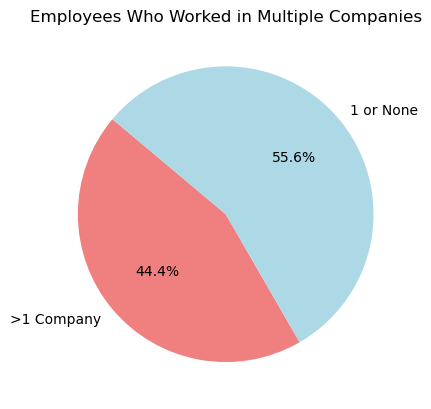

In [16]:
import matplotlib.pyplot as plt

# Count employees who worked in multiple companies
multi_company = (ibm['NumCompaniesWorked'] > 1).sum()
total_employees = len(ibm)
print(f"\nEmployees who worked in multiple companies: {multi_company} out of {total_employees}")

# Pie chart
labels = ['>1 Company', '1 or None']
sizes = [multi_company, total_employees - multi_company]
colors = ['lightcoral', 'lightblue']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Employees Who Worked in Multiple Companies")
plt.show()


# --- Q27: How does attrition vary based on work-life balance score? ---


 Attrition by Work-Life Balance:
                  Total  Attrition_Count  Attrition_Rate
WorkLifeBalance                                        
1                    3                1           0.333
2                   29                4           0.138
3                   60                9           0.150
4                    7                1           0.143


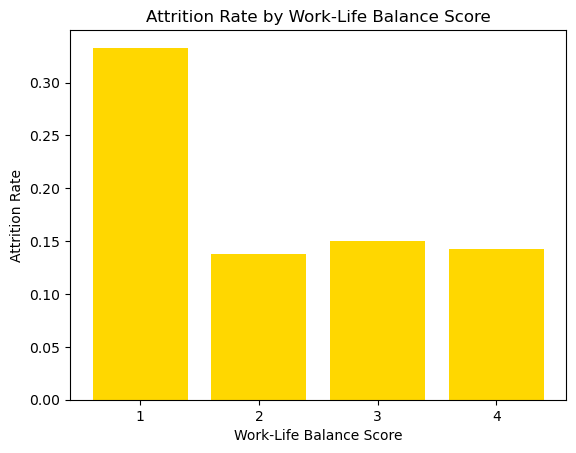

In [17]:
import matplotlib.pyplot as plt

# Group by WorkLifeBalance and calculate attrition
q27 = ibm.groupby('WorkLifeBalance')['Attrition_Flag'].agg(['count', 'sum']).rename(
    columns={'count': 'Total', 'sum': 'Attrition_Count'}
)
q27['Attrition_Rate'] = (q27['Attrition_Count'] / q27['Total']).round(3)

print("\n Attrition by Work-Life Balance:\n", q27)

# Plot attrition rate
plt.bar(q27.index.astype(str), q27['Attrition_Rate'], color='gold')
plt.title("Attrition Rate by Work-Life Balance Score")
plt.xlabel("Work-Life Balance Score")
plt.ylabel("Attrition Rate")
plt.show()


# --- Q28: What is the average monthly income per job role? ---


 Average Monthly Income by Job Role:
                            count      mean   median
JobRole                                            
Manager                        4  17056.00  17187.0
Research Director              7  14885.00  13549.0
Healthcare Representative      8   8782.25   9990.0
Sales Executive               20   6598.60   5463.5
Manufacturing Director         9   6464.44   6162.0
Human Resources                1   5021.00   5021.0
Research Scientist            20   3630.00   2991.0
Laboratory Technician         25   3087.80   2670.0
Sales Representative           5   2502.40   2322.0


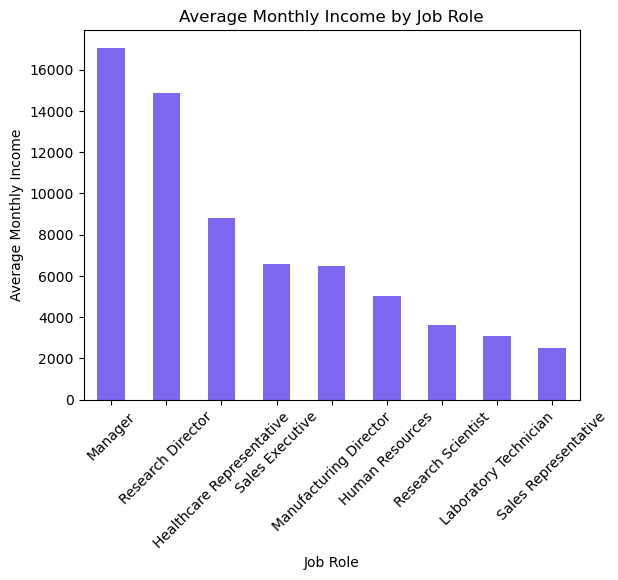

In [18]:
import matplotlib.pyplot as plt

# Group by JobRole and calculate count, mean, median of MonthlyIncome
q28 = ibm.groupby('JobRole')['MonthlyIncome'].agg(['count', 'mean', 'median']).round(2).sort_values('mean', ascending=False)
print("\n Average Monthly Income by Job Role:\n", q28)

# Plot average monthly income
q28['mean'].plot(kind='bar', color='mediumslateblue')
plt.title("Average Monthly Income by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Average Monthly Income")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


# --- Q29: Which education field has the most employees? ---


Q29 ➤ Education field with most employees:
      EducationField  Employee_Count
0     Life Sciences              44
1           Medical              32
2         Marketing              10
3             Other               7
4  Technical Degree               6


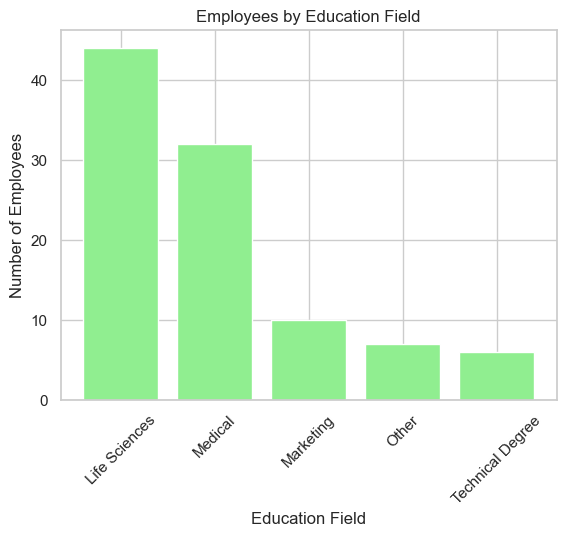

In [95]:
import matplotlib.pyplot as plt

# Count of employees by EducationField
q29 = ibm['EducationField'].value_counts().reset_index()
q29.columns = ['EducationField', 'Employee_Count']
print("\nQ29 ➤ Education field with most employees:\n", q29)

# Plot
plt.bar(q29['EducationField'], q29['Employee_Count'], color='lightgreen')
plt.title("Employees by Education Field")
plt.xlabel("Education Field")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


# --- Q30: How does attrition vary across different education fields? ---


 Attrition rate by Education Field:
                   Total  Attrition_Count  Attrition_Rate
EducationField                                          
Technical Degree      6                3           0.500
Other                 7                1           0.143
Life Sciences        44                6           0.136
Medical              32                4           0.125
Marketing            10                1           0.100


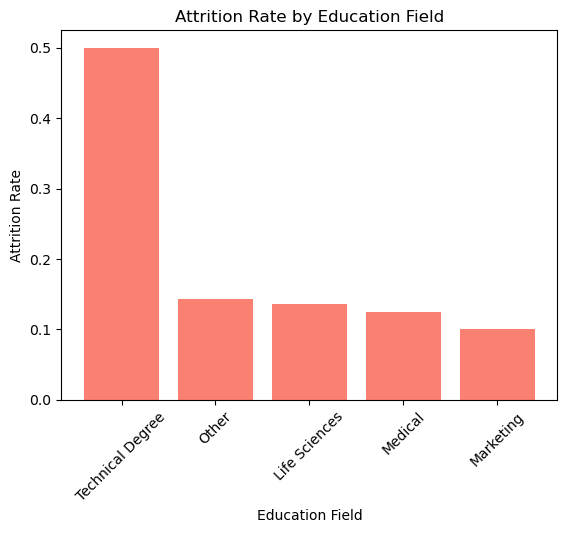

In [19]:
import matplotlib.pyplot as plt

# Group by EducationField and calculate attrition
q30 = ibm.groupby('EducationField')['Attrition_Flag'].agg(['count', 'sum']).rename(
    columns={'count': 'Total', 'sum': 'Attrition_Count'}
)
q30['Attrition_Rate'] = (q30['Attrition_Count'] / q30['Total']).round(3)
q30 = q30.sort_values('Attrition_Rate', ascending=False)

print("\n Attrition rate by Education Field:\n", q30)

# Plot
plt.bar(q30.index, q30['Attrition_Rate'], color='salmon')
plt.title("Attrition Rate by Education Field")
plt.xlabel("Education Field")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


# 31. Average years since last promotion by department

In [20]:

avg_promotion_by_dept = ibm.groupby('Department')['YearsSinceLastPromotion'].mean().round(2)
print("\n Average Years Since Last Promotion by Department:\n", avg_promotion_by_dept)


 Average Years Since Last Promotion by Department:
 Department
Human Resources           0.00
Research & Development    2.35
Sales                     1.74
Name: YearsSinceLastPromotion, dtype: float64


# 32. Are employees with more training sessions more satisfi

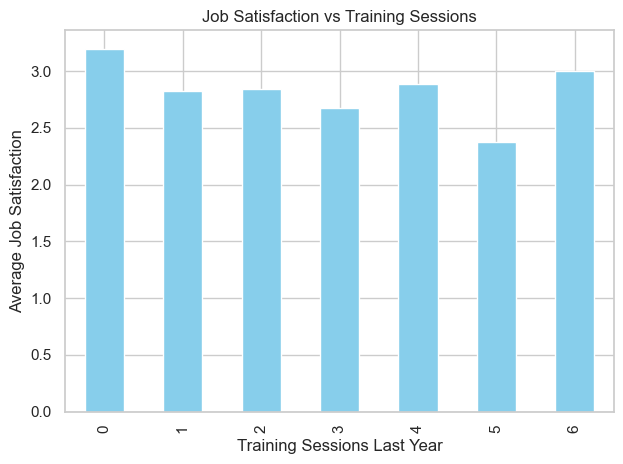

In [101]:
# Average JobSatisfaction by TrainingTimesLastYear
training_vs_satisfaction = ibm.groupby('TrainingTimesLastYear')['JobSatisfaction'].mean().round(2)

# Plot
training_vs_satisfaction.plot(kind='bar', title='Job Satisfaction vs Training Sessions', color='skyblue')
plt.xlabel('Training Sessions Last Year')
plt.ylabel('Average Job Satisfaction')
plt.tight_layout()
plt.show()


# 33. How does performance rating affect salary hikes?


 Average Percent Salary Hike by Performance Rating:
 PerformanceRating
3    13.62
4    21.86
Name: PercentSalaryHike, dtype: float64


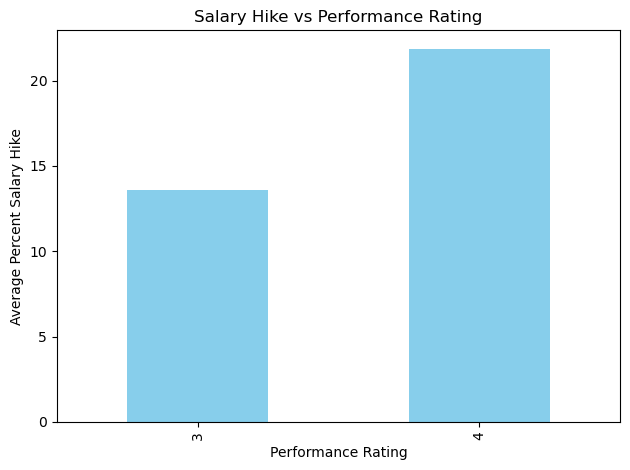

In [21]:
performance_vs_hike = ibm.groupby('PerformanceRating')['PercentSalaryHike'].mean().round(2)
print("\n Average Percent Salary Hike by Performance Rating:\n", performance_vs_hike)

performance_vs_hike.plot(kind='bar', title='Salary Hike vs Performance Rating', color='skyblue')
plt.xlabel('Performance Rating')
plt.ylabel('Average Percent Salary Hike')
plt.tight_layout()
plt.show()


# 34 Do employees with high environment satisfaction report high job satisfaction?


 Job Satisfaction by Environment Satisfaction:
 EnvironmentSatisfaction
1    2.95
2    2.29
3    2.54
4    3.32
Name: JobSatisfaction, dtype: float64


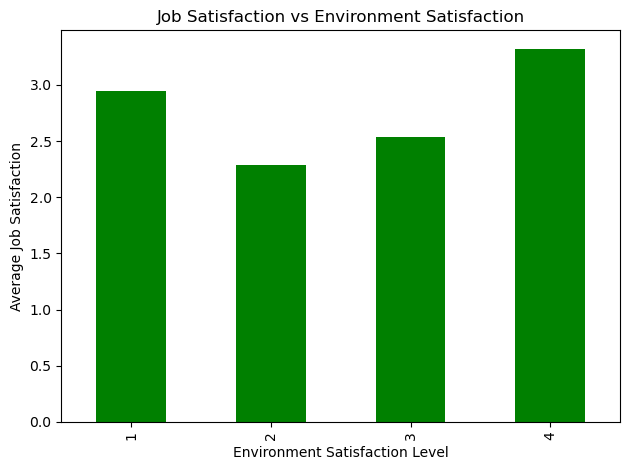

In [22]:
env_vs_job_satisfaction = ibm.groupby('EnvironmentSatisfaction')['JobSatisfaction'].mean().round(2)
print("\n Job Satisfaction by Environment Satisfaction:\n", env_vs_job_satisfaction)

env_vs_job_satisfaction.plot(kind='bar', title='Job Satisfaction vs Environment Satisfaction', color='green')
plt.xlabel('Environment Satisfaction Level')
plt.ylabel('Average Job Satisfaction')
plt.tight_layout()
plt.show()


# 35. Gender ratio across different job roles

In [23]:
gender_ratio = ibm.groupby('JobRole')['Gender'].value_counts().unstack().fillna(0)
gender_ratio['Total'] = gender_ratio.sum(axis=1)
gender_ratio['Female %'] = (gender_ratio['Female'] / gender_ratio['Total'] * 100).round(2)
gender_ratio['Male %'] = (gender_ratio['Male'] / gender_ratio['Total'] * 100).round(2)
print("\n Gender Ratio by Job Role:\n", gender_ratio)



 Gender Ratio by Job Role:
 Gender                     Female  Male  Total  Female %  Male %
JobRole                                                         
Healthcare Representative     2.0   6.0    8.0     25.00   75.00
Human Resources               0.0   1.0    1.0      0.00  100.00
Laboratory Technician         7.0  18.0   25.0     28.00   72.00
Manager                       4.0   0.0    4.0    100.00    0.00
Manufacturing Director        3.0   6.0    9.0     33.33   66.67
Research Director             5.0   2.0    7.0     71.43   28.57
Research Scientist            5.0  15.0   20.0     25.00   75.00
Sales Executive               8.0  12.0   20.0     40.00   60.00
Sales Representative          1.0   4.0    5.0     20.00   80.00


# 36. Average age per job role

In [24]:
avg_age_by_role = ibm.groupby('JobRole')['Age'].mean().round(2)
print("\n Average Age by Job Role:\n", avg_age_by_role)



 Average Age by Job Role:
 JobRole
Healthcare Representative    38.88
Human Resources              46.00
Laboratory Technician        33.84
Manager                      51.75
Manufacturing Director       35.22
Research Director            42.00
Research Scientist           34.55
Sales Executive              40.25
Sales Representative         36.60
Name: Age, dtype: float64


# 37. Business travel category with highest average monthly income


 Average Monthly Income by Business Travel Category:
 BusinessTravel
Non-Travel           5158.00
Travel_Frequently    6571.29
Travel_Rarely        6019.70
Name: MonthlyIncome, dtype: float64


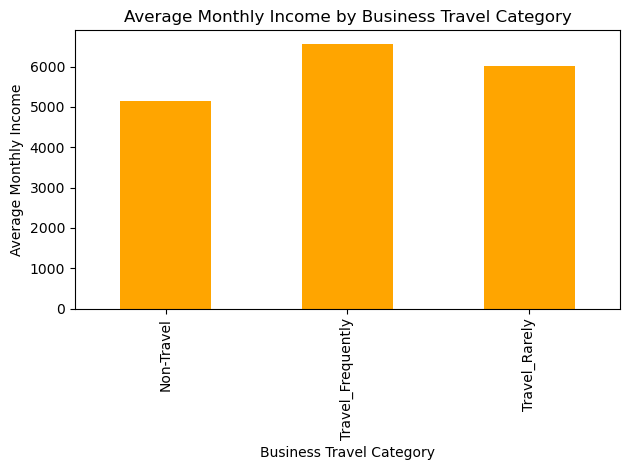

In [25]:
avg_income_by_travel = ibm.groupby('BusinessTravel')['MonthlyIncome'].mean().round(2)
print("\n Average Monthly Income by Business Travel Category:\n", avg_income_by_travel)

avg_income_by_travel.plot(kind='bar', title='Average Monthly Income by Business Travel Category', color='orange')
plt.xlabel('Business Travel Category')
plt.ylabel('Average Monthly Income')
plt.tight_layout()
plt.show()


# 38. Do employees with higher job involvement have better performance ratings?


 Performance Rating by Job Involvement Level:
 JobInvolvement
1    3.25
2    3.15
3    3.26
4    3.10
Name: PerformanceRating, dtype: float64


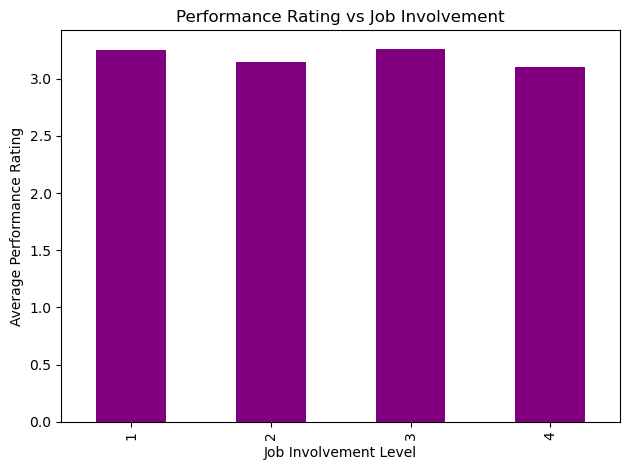

In [26]:
involvement_vs_rating = ibm.groupby('JobInvolvement')['PerformanceRating'].mean().round(2)
print("\n Performance Rating by Job Involvement Level:\n", involvement_vs_rating)

involvement_vs_rating.plot(kind='bar', title='Performance Rating vs Job Involvement', color='purple')
plt.xlabel('Job Involvement Level')
plt.ylabel('Average Performance Rating')
plt.tight_layout()
plt.show()


# 39. Number of employees in each job level


Employee Count by Job Level:
 JobLevel
1    39
2    33
3    19
4     4
5     4
Name: count, dtype: int64


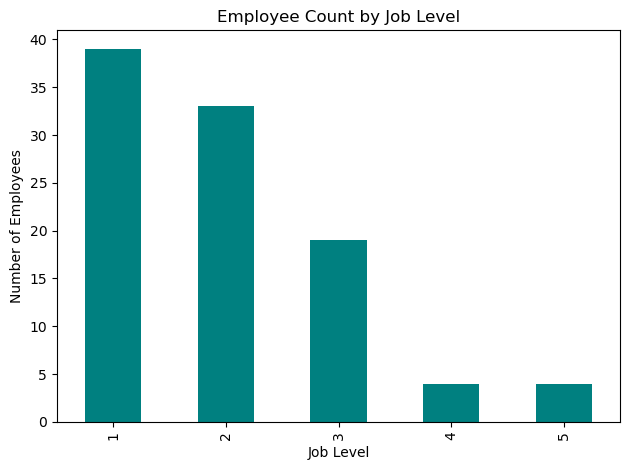

In [27]:
job_level_counts = ibm['JobLevel'].value_counts().sort_index()
print("\nEmployee Count by Job Level:\n", job_level_counts)

job_level_counts.plot(kind='bar', title='Employee Count by Job Level', color='teal')
plt.xlabel('Job Level')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()


# 40. Correlation between monthly income and total working years

In [28]:
correlation = ibm['MonthlyIncome'].corr(ibm['TotalWorkingYears'])
print(f"\nCorrelation between Monthly Income and Total Working Years: {correlation:.4f}")



Correlation between Monthly Income and Total Working Years: 0.7170


# 41.Which department has the most employees?

In [111]:
# Count of employees per department
dept_counts = ibm['Department'].value_counts()
print("\nEmployee count by Department:\n", dept_counts)

# Department with most employees
most_employees_dept = dept_counts.idxmax()
most_employees_count = dept_counts.max()
print(f"\nDepartment with most employees: {most_employees_dept} ({most_employees_count} employees)")



Employee count by Department:
 Department
Research & Development    71
Sales                     27
Human Resources            1
Name: count, dtype: int64

Department with most employees: Research & Development (71 employees)


# 42 what is the distribution of job satisfaction scores?


Distribution of Job Satisfaction Scores:
 JobSatisfaction
1    20
2    15
3    32
4    32
Name: count, dtype: int64


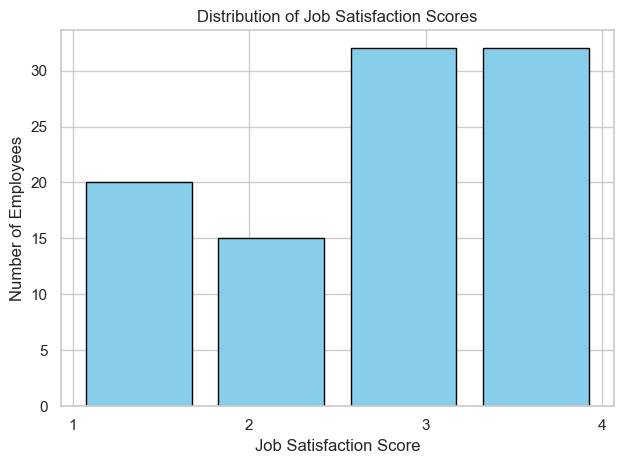

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Count of each JobSatisfaction score
job_satisfaction_counts = ibm['JobSatisfaction'].value_counts().sort_index()
print("\nDistribution of Job Satisfaction Scores:\n", job_satisfaction_counts)

# Histogram
plt.hist(ibm['JobSatisfaction'], bins=ibm['JobSatisfaction'].nunique(), 
         edgecolor='black', color='skyblue', rwidth=0.8)
plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Employees')
plt.xticks(range(1, ibm['JobSatisfaction'].max() + 1))  # show integer x-ticks
plt.tight_layout()
plt.show()


# 43 What is the trend of attrition across different job roles and job levels?


In [114]:
import pandas as pd
# Group by JobRole and JobLevel, count attrition
# Calculate attrition percentage by JobRole and JobLevel
attrition_trend = (
    ibm.groupby(['JobRole', 'JobLevel'])['Attrition']
    .value_counts(normalize=True)   # gives fraction
    .rename('AttritionRate')
    .mul(100)                       # convert to percentage
    .reset_index()
)

# Keep only the 'Yes' attrition rates
attrition_trend = attrition_trend[attrition_trend['Attrition'] == 'Yes'].drop('Attrition', axis=1)


print("\nAttrition Trend by Job Role and Job Level:\n", attrition_trend.head(10))



Attrition Trend by Job Role and Job Level:
                   JobRole  JobLevel  AttritionRate
5   Laboratory Technician         1      21.052632
7   Laboratory Technician         3     100.000000
14      Research Director         5      50.000000
16     Research Scientist         1      25.000000
20        Sales Executive         2       7.142857
22        Sales Executive         3      20.000000
25   Sales Representative         1      50.000000
26   Sales Representative         2     100.000000


# 44 What is the average work-life balance score across departments?

In [116]:
import pandas as pd

# Average Work-Life Balance score by Department
avg_wlb = (
    ibm.groupby('Department')['WorkLifeBalance']
    .mean()
    .reset_index()
    .rename(columns={'WorkLifeBalance': 'AverageWorkLifeBalance'})
)
print("\nAverage Work-Life Balance by Department:\n", avg_wlb)



Average Work-Life Balance by Department:
                Department  AverageWorkLifeBalance
0         Human Resources                3.000000
1  Research & Development                2.760563
2                   Sales                2.592593


# 45.Which age group has the highest number of managers or executives?



Number of Managers/Executives by Age Group:
 AgeGroup
18-25    1
26-35    7
36-45    5
46-55    6
56-65    5
Name: count, dtype: int64

Age group with the most managers/executives: 26-35 (7 employees)


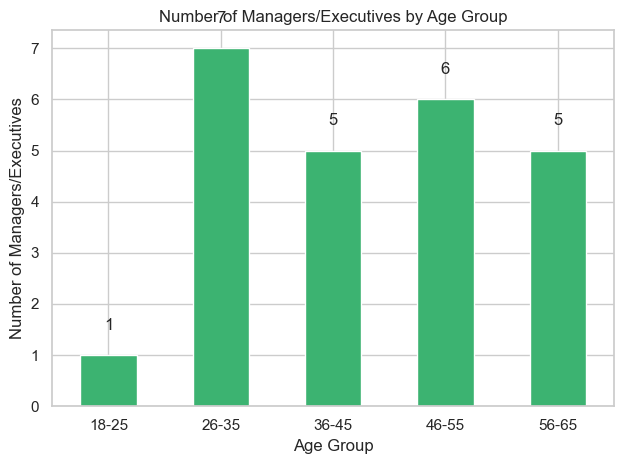

In [119]:
import pandas as pd

# Create age bins and labels
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
ibm['AgeGroup'] = pd.cut(ibm['Age'], bins=bins, labels=labels, right=False)

# Filter rows where JobRole contains 'Manager' or 'Executive'
managers_executives = ibm[ibm['JobRole'].str.contains('Manager|Executive', case=False, na=False)]

# Count number of managers/executives per age group
age_group_counts = managers_executives['AgeGroup'].value_counts().sort_index()
print("\nNumber of Managers/Executives by Age Group:\n", age_group_counts)

# Identify the age group with the most managers/executives
top_age_group = age_group_counts.idxmax()
top_count = age_group_counts.max()
print(f"\nAge group with the most managers/executives: {top_age_group} ({top_count} employees)")

import matplotlib.pyplot as plt

# Bar chart of managers/executives by age group
age_group_counts.plot(kind='bar', color='mediumseagreen')
plt.title("Number of Managers/Executives by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Managers/Executives")
plt.xticks(rotation=0)  # keep x-axis labels horizontal
plt.tight_layout()

# Annotate bars with counts
for i, count in enumerate(age_group_counts):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.show()



# 46.Are older employees more satisfied with their work environment?



Average Environment Satisfaction by Age Group:
   AgeGroup  AvgEnvironmentSatisfaction
0    18-25                    2.333333
1    26-35                    2.583333
2    36-45                    2.735294
3    46-55                    2.250000
4    56-65                    2.571429


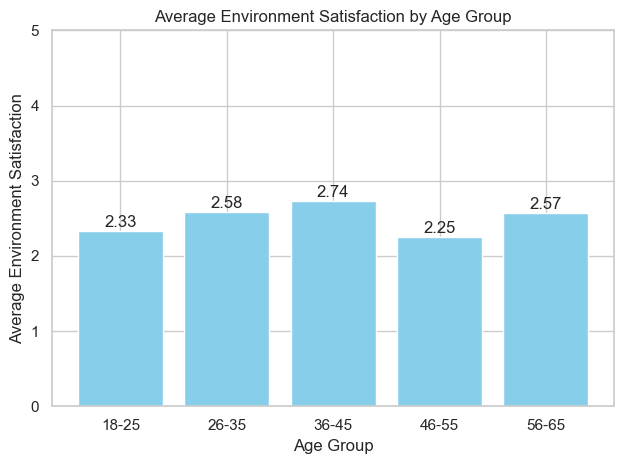

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by AgeGroup and calculate average EnvironmentSatisfaction
avg_env_satisfaction = (
    ibm.groupby('AgeGroup', observed=True)['EnvironmentSatisfaction']
    .mean()
    .reset_index()
    .rename(columns={'EnvironmentSatisfaction': 'AvgEnvironmentSatisfaction'})
)
print("\nAverage Environment Satisfaction by Age Group:\n", avg_env_satisfaction)

# Plot
plt.bar(avg_env_satisfaction['AgeGroup'], avg_env_satisfaction['AvgEnvironmentSatisfaction'], color='skyblue')
plt.title("Average Environment Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Environment Satisfaction")
plt.xticks(rotation=0)
plt.ylim(0, 5)  # assuming satisfaction scores are 1-5
plt.tight_layout()

# Annotate bars
for i, val in enumerate(avg_env_satisfaction['AvgEnvironmentSatisfaction']):
    plt.text(i, val + 0.05, f"{val:.2f}", ha='center')

plt.show()


# 47.What is the most common business travel frequency among top performers?



Business Travel Frequency among Top Performers:
 BusinessTravel
Travel_Rarely        13
Travel_Frequently     7
Non-Travel            1
Name: count, dtype: int64

Most common business travel frequency among top performers: Travel_Rarely (13 employees)


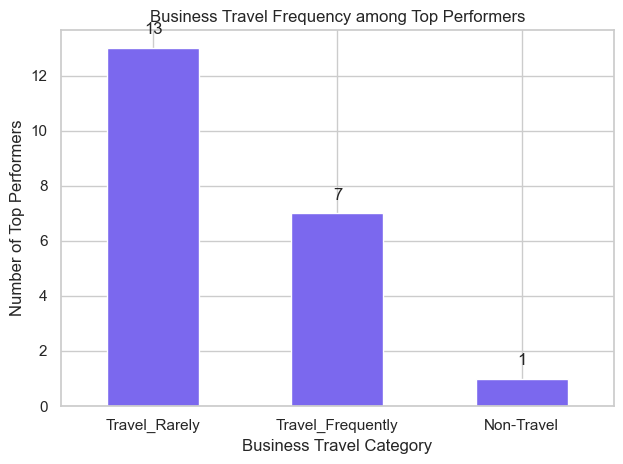

In [122]:
import pandas as pd

# Filter top performers (assuming PerformanceRating = 4 is top)
top_performers = ibm[ibm['PerformanceRating'] == 4]

# Count BusinessTravel frequency among top performers
travel_counts = top_performers['BusinessTravel'].value_counts()
print("\nBusiness Travel Frequency among Top Performers:\n", travel_counts)

# Most common travel frequency
most_common_travel = travel_counts.idxmax()
most_common_count = travel_counts.max()
print(f"\nMost common business travel frequency among top performers: {most_common_travel} ({most_common_count} employees)")

import matplotlib.pyplot as plt

# Bar chart
travel_counts.plot(kind='bar', color='mediumslateblue')
plt.title("Business Travel Frequency among Top Performers")
plt.xlabel("Business Travel Category")
plt.ylabel("Number of Top Performers")
plt.xticks(rotation=0)

# Annotate bars with counts
for i, count in enumerate(travel_counts):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.tight_layout()
plt.show()


# 48.How does training frequency affect job satisfaction?



Average Job Satisfaction by Training Frequency:
    TrainingTimesLastYear  AverageJobSatisfaction
0                      0                3.200000
1                      1                2.833333
2                      2                2.838710
3                      3                2.675676
4                      4                2.888889
5                      5                2.375000
6                      6                3.000000


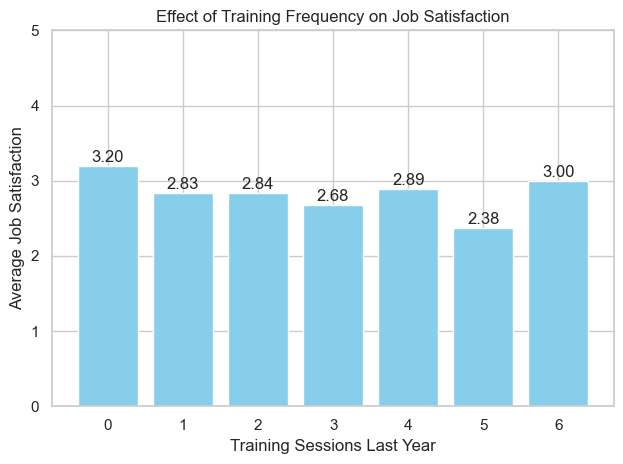

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Average Job Satisfaction by number of training sessions
training_effect = (
    ibm.groupby('TrainingTimesLastYear', observed=True)['JobSatisfaction']
    .mean()
    .reset_index()
    .rename(columns={'JobSatisfaction': 'AverageJobSatisfaction'})
)
print("\nAverage Job Satisfaction by Training Frequency:\n", training_effect)

# Plot
plt.bar(training_effect['TrainingTimesLastYear'], training_effect['AverageJobSatisfaction'], color='skyblue')
plt.title("Effect of Training Frequency on Job Satisfaction")
plt.xlabel("Training Sessions Last Year")
plt.ylabel("Average Job Satisfaction")
plt.xticks(training_effect['TrainingTimesLastYear'])
plt.ylim(0, 5)  # assuming JobSatisfaction scale is 1-5
plt.tight_layout()

# Annotate bars with exact values
for i, val in enumerate(training_effect['AverageJobSatisfaction']):
    plt.text(i, val + 0.05, f"{val:.2f}", ha='center')

plt.show()


# 49.Which combination of factors (age, job role, income) is most linked to attrition?


Top 10 Age Group & Job Role Combinations Linked to Attrition:
    AgeGroup                JobRole  AttritionRate  AverageIncome
25    46-55   Sales Representative         100.00    2683.000000
17    36-45   Sales Representative          66.67    2502.333333
14    36-45      Research Director          50.00   16604.500000
20    46-55  Laboratory Technician          50.00    3728.000000
2     18-25     Research Scientist          50.00    1762.500000
24    46-55        Sales Executive          33.33    6944.000000
9     26-35     Research Scientist          25.00    3427.625000
6     26-35  Laboratory Technician          21.43    3281.428571
16    36-45        Sales Executive          20.00    6330.600000
12    36-45  Laboratory Technician          14.29    2599.142857


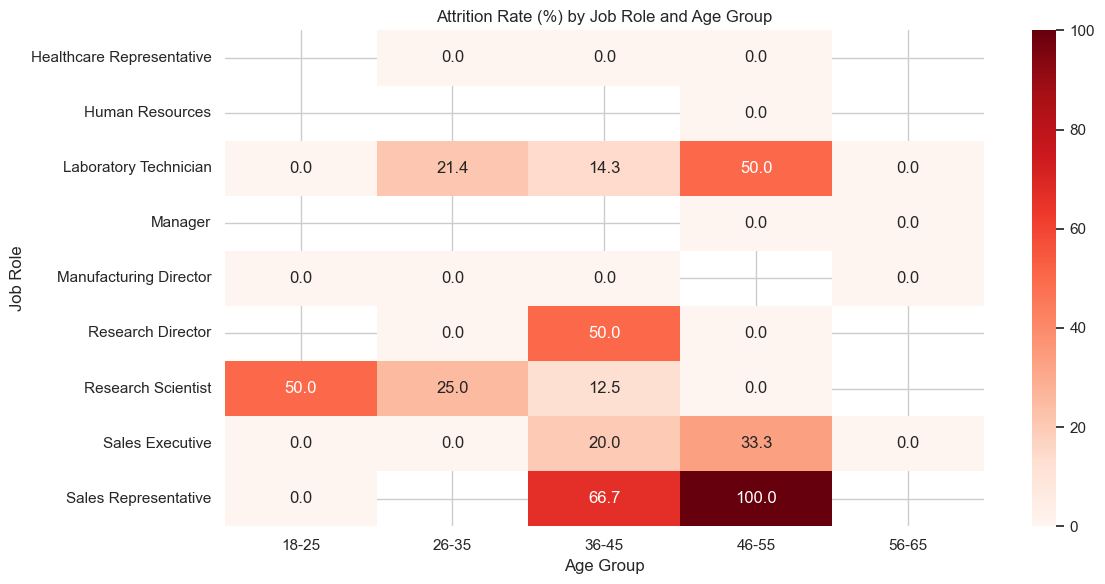

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Create AttritionFlag: 1 = Yes, 0 = No
ibm['AttritionFlag'] = ibm['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by AgeGroup and JobRole
attrition_combo = (
    ibm.groupby(['AgeGroup', 'JobRole'], observed=True)
    .agg({'AttritionFlag': 'mean', 'MonthlyIncome': 'mean'})
    .rename(columns={'AttritionFlag': 'AttritionRate', 'MonthlyIncome': 'AverageIncome'})
    .reset_index()
)

# Convert attrition rate to percentage
attrition_combo['AttritionRate'] = (attrition_combo['AttritionRate'] * 100).round(2)

# Show top 10 combinations with highest attrition
top_attrition_combo = attrition_combo.sort_values('AttritionRate', ascending=False).head(10)
print("\nTop 10 Age Group & Job Role Combinations Linked to Attrition:\n", top_attrition_combo)
import seaborn as sns

# Pivot table for heatmap
heatmap_data = attrition_combo.pivot(index='JobRole', columns='AgeGroup', values='AttritionRate')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Reds")
plt.title("Attrition Rate (%) by Job Role and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()


# 50.Can we predict potential attrition based on salary, satisfaction, and working years (for ML modeling)?

Accuracy: 0.8500


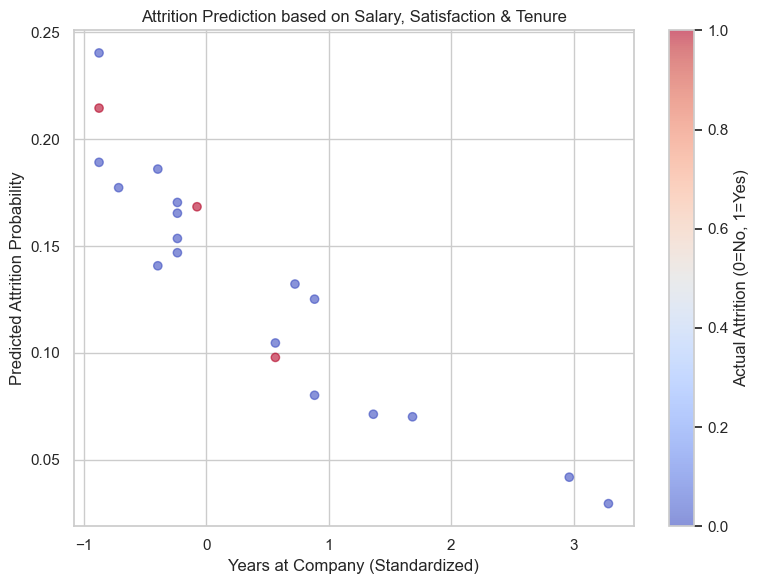

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Prepare dataset
ibm['Attrition_Flag'] = ibm['Attrition'].map({'Yes':1,'No':0})
X = ibm[['MonthlyIncome','JobSatisfaction','YearsAtCompany']]
y = ibm['Attrition_Flag']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate
accuracy = model.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy:.4f}")

# Predicted probabilities
probs = model.predict_proba(X_test_scaled)[:,1]

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_test_scaled[:,2], probs, c=y_test, cmap='coolwarm', alpha=0.6)
plt.xlabel("Years at Company (Standardized)")
plt.ylabel("Predicted Attrition Probability")
plt.title("Attrition Prediction based on Salary, Satisfaction & Tenure")
plt.colorbar(label="Actual Attrition (0=No, 1=Yes)")
plt.tight_layout()
plt.show()
